In [8]:
import pandas as pd
import seaborn as sns

Important top 5 variables are : 

* Price 
* Province
* surface of the plot
* Energy class
* bathroom ,toilets and bedroom

Because price correlated better with bathroom,bedroom and toilets and i think to predict price we should use location or province or postal code for segregation. surface of the plot is important for prediction too.

The most expensive municipalities in Belgium? (Average price, median price, price per square meter)
* bruxelles , knokke-heist, knokke zoute, saint-gilles
* Mean price of 10 most expensive municipalities are 7.940000e+06
* Median value is 6495000.0

In [9]:
final1=pd.read_csv('final1.csv')
indices = final1['Price'].sort_values().tail(10).index
result = final1.loc[indices, ['Price', 'Location', 'postal code', 'immo code', 'Surface of the plot', 'province']]
result

,Price,Location,postal code,immo code,Surface of the plot,province
2837,5650000.0,knokke-heist,8300,10659102,561,West Flanders
3003,5650000.0,knokke-heist,8300,10658622,561,West Flanders
4495,5850000.0,knokke,8300,10654776,988,West Flanders
8438,6385000.0,knokke-heist,8300,10643422,1575,West Flanders
3002,6495000.0,knokke-zoute,8300,10658623,1106,West Flanders
1370,6495000.0,knokke-heist,8300,10663663,1106,West Flanders
2216,6500000.0,saint-gilles,1060,10660584,0,Brussels Capital Region
210,6900000.0,ixelles,1050,10666915,0,Brussels Capital Region
3260,6975000.0,knokke-heist,8300,10657912,1670,West Flanders
7539,22500000.0,bruxelles,1000,10646094,0,Brussels Capital Region


In [10]:
result.describe()

,Price,immo code,Surface of the plot
count,1.000000e+01,1.000000e+01,10.00000
mean,7.940000e+06,1.065697e+07,756.70000
std,5.137340e+06,7.259506e+03,632.07191
min,5.650000e+06,1.064342e+07,0.00000
25%,5.983750e+06,1.065556e+07,140.25000
50%,6.495000e+06,1.065862e+07,774.50000
75%,6.800000e+06,1.066021e+07,1106.00000
max,2.250000e+07,1.066692e+07,1670.00000


In [11]:
median_value=result['Price'].median()
median_value

6495000.0

* price per square meter is as follows

In [12]:
result['price/sqm']=result['Price']/result['Surface of the plot']
result

,Price,Location,postal code,immo code,Surface of the plot,province,price/sqm
2837,5650000.0,knokke-heist,8300,10659102,561,West Flanders,1.007130e+04
3003,5650000.0,knokke-heist,8300,10658622,561,West Flanders,1.007130e+04
4495,5850000.0,knokke,8300,10654776,988,West Flanders,5.921053e+03
8438,6385000.0,knokke-heist,8300,10643422,1575,West Flanders,4.053968e+03
3002,6495000.0,knokke-zoute,8300,10658623,1106,West Flanders,5.872514e+03
1370,6495000.0,knokke-heist,8300,10663663,1106,West Flanders,5.872514e+03
2216,6500000.0,saint-gilles,1060,10660584,0,Brussels Capital Region,inf
210,6900000.0,ixelles,1050,10666915,0,Brussels Capital Region,inf
3260,6975000.0,knokke-heist,8300,10657912,1670,West Flanders,4.176647e+03
7539,22500000.0,bruxelles,1000,10646094,0,Brussels Capital Region,inf


What are the less expensive municipalities in Belgium? (Average price, median price, price per square meter)
* esneux, willebroek, durbuy,saint-nicolas montegnée, vielsalm are the less expensive municipalities in Belgium.
* Average price value is 65464.700000
* Median value is 65000.0

In [13]:
final1 = final1.drop(final1[final1['Price'] < 60000].index)
indices = final1['Price'].sort_values().head(10).index
result = final1.loc[indices, ['Price', 'Location', 'postal code', 'immo code', 'Surface of the plot', 'province']]
result

,Price,Location,postal code,immo code,Surface of the plot,province
8098,60000.0,esneux,4130,10514624,0,Liège
4329,62647.0,willebroek,2830,10655084,0,Antwerp
2675,63000.0,durbuy,6940,10659448,0,Luxembourg (shared with Eastern Hainaut)
4273,63000.0,durbuy,6940,10655211,0,Luxembourg (shared with Eastern Hainaut)
4764,65000.0,saint-nicolas montegnée,4420,10654056,0,Liège
7625,65000.0,vielsalm,6690,10645908,0,Luxembourg (shared with Eastern Hainaut)
3656,69000.0,durbuy,6941,10656737,200,Luxembourg (shared with Eastern Hainaut)
1317,69000.0,chaudfontaine,4050,10663785,180,Liège
1316,69000.0,trooz,4870,10519131,124,Liège
1136,69000.0,montignies-sur-sambre,6061,10664213,180,Luxembourg (shared with Eastern Hainaut)


In [14]:
result.describe()

,Price,immo code,Surface of the plot
count,10.000000,1.000000e+01,10.000000
mean,65464.700000,1.062882e+07,68.400000
std,3339.613219,5.923605e+04,90.302209
min,60000.000000,1.051462e+07,0.000000
25%,63000.000000,1.064794e+07,0.000000
50%,65000.000000,1.065515e+07,0.000000
75%,69000.000000,1.065877e+07,166.000000
max,69000.000000,1.066421e+07,200.000000


In [15]:
median_value=result['Price'].median()
median_value

65000.0

In [16]:
result['price/sqm']=result['Price']/result['Surface of the plot']
result

,Price,Location,postal code,immo code,Surface of the plot,province,price/sqm
8098,60000.0,esneux,4130,10514624,0,Liège,inf
4329,62647.0,willebroek,2830,10655084,0,Antwerp,inf
2675,63000.0,durbuy,6940,10659448,0,Luxembourg (shared with Eastern Hainaut),inf
4273,63000.0,durbuy,6940,10655211,0,Luxembourg (shared with Eastern Hainaut),inf
4764,65000.0,saint-nicolas montegnée,4420,10654056,0,Liège,inf
7625,65000.0,vielsalm,6690,10645908,0,Luxembourg (shared with Eastern Hainaut),inf
3656,69000.0,durbuy,6941,10656737,200,Luxembourg (shared with Eastern Hainaut),345.000000
1317,69000.0,chaudfontaine,4050,10663785,180,Liège,383.333333
1316,69000.0,trooz,4870,10519131,124,Liège,556.451613
1136,69000.0,montignies-sur-sambre,6061,10664213,180,Luxembourg (shared with Eastern Hainaut),383.333333


In [17]:
flanders = ['West Flanders', 'East Flanders', 'Antwerp', 'Flemish Brabant', 'Limburg']
walonia = ['Hainaut (West)','Liège','Luxembourg (shared with Eastern Hainaut)','Walloon Brabant','Namur']

Flanders
What are the most expensive municipalities in Flanders? (Average price, median price, price per square meter)
* knokke is the most expensive municipality
* Average price is 6.045000e+06	
* Median price is 5750000.0

In [18]:
flanders_list = final1[final1['province'].isin(flanders)]
indices = flanders_list['Price'].sort_values().tail(10).index
result = flanders_list.loc[indices, ['Price', 'Location', 'postal code', 'immo code', 'Surface of the plot', 'province']]
result

,Price,Location,postal code,immo code,Surface of the plot,province
2397,5650000.0,knokke-heist,8300,10660118,561,West Flanders
2410,5650000.0,knokke-heist knokke,8300,10660088,561,West Flanders
2770,5650000.0,knokke-heist,8300,10659293,561,West Flanders
2837,5650000.0,knokke-heist,8300,10659102,561,West Flanders
3003,5650000.0,knokke-heist,8300,10658622,561,West Flanders
4495,5850000.0,knokke,8300,10654776,988,West Flanders
8438,6385000.0,knokke-heist,8300,10643422,1575,West Flanders
3002,6495000.0,knokke-zoute,8300,10658623,1106,West Flanders
1370,6495000.0,knokke-heist,8300,10663663,1106,West Flanders
3260,6975000.0,knokke-heist,8300,10657912,1670,West Flanders


In [19]:
result.describe()

,Price,immo code,Surface of the plot
count,1.000000e+01,1.000000e+01,10.000000
mean,6.045000e+06,1.065756e+07,925.000000
std,4.948232e+05,5.432180e+03,435.825653
min,5.650000e+06,1.064342e+07,561.000000
25%,5.650000e+06,1.065809e+07,561.000000
50%,5.750000e+06,1.065886e+07,774.500000
75%,6.467500e+06,1.065989e+07,1106.000000
max,6.975000e+06,1.066366e+07,1670.000000


In [20]:
median_value=result['Price'].median()
median_value

5750000.0

In [21]:
result['price/sqm']=result['Price']/result['Surface of the plot']
result

,Price,Location,postal code,immo code,Surface of the plot,province,price/sqm
2397,5650000.0,knokke-heist,8300,10660118,561,West Flanders,10071.301248
2410,5650000.0,knokke-heist knokke,8300,10660088,561,West Flanders,10071.301248
2770,5650000.0,knokke-heist,8300,10659293,561,West Flanders,10071.301248
2837,5650000.0,knokke-heist,8300,10659102,561,West Flanders,10071.301248
3003,5650000.0,knokke-heist,8300,10658622,561,West Flanders,10071.301248
4495,5850000.0,knokke,8300,10654776,988,West Flanders,5921.052632
8438,6385000.0,knokke-heist,8300,10643422,1575,West Flanders,4053.968254
3002,6495000.0,knokke-zoute,8300,10658623,1106,West Flanders,5872.513562
1370,6495000.0,knokke-heist,8300,10663663,1106,West Flanders,5872.513562
3260,6975000.0,knokke-heist,8300,10657912,1670,West Flanders,4176.646707


What are the less expensive municipalities in Flanders? (Average price, median price, price per square meter)
* willebroek, hoboken,klemskerke , de haan, de panne, westende, dilsen-stokkem, blankenberge, ronse re top 10 less expensive municipalities.
* Average price is 79834.700000
* Medain price is 80950.0

In [22]:
indices = flanders_list['Price'].sort_values().head(10).index
result = flanders_list.loc[indices, ['Price', 'Location', 'postal code', 'immo code', 'Surface of the plot', 'province']]
result

,Price,Location,postal code,immo code,Surface of the plot,province
4329,62647.0,willebroek,2830,10655084,0,Antwerp
3127,73000.0,klemskerke,8420,10658291,0,West Flanders
384,77800.0,hoboken,2660,10666530,0,Antwerp
5506,79000.0,de haan,8420,10431477,0,West Flanders
1475,79000.0,de panne,8660,10663421,0,West Flanders
2038,82900.0,de haan,8420,10661651,0,West Flanders
1846,85000.0,westende,8434,10662327,0,West Flanders
2388,85000.0,dilsen-stokkem,3650,10660129,258,Limburg
3339,85000.0,blankenberge,8370,10657747,0,West Flanders
2072,89000.0,ronse,9600,10661558,0,East Flanders


In [23]:
result.describe()

,Price,immo code,Surface of the plot
count,10.000000,1.000000e+01,10.000000
mean,79834.700000,1.063782e+07,25.800000
std,7609.229543,7.257257e+04,81.586764
min,62647.000000,1.043148e+07,0.000000
25%,78100.000000,1.065788e+07,0.000000
50%,80950.000000,1.066084e+07,0.000000
75%,85000.000000,1.066216e+07,0.000000
max,89000.000000,1.066653e+07,258.000000


In [24]:
median_value=result['Price'].median()
median_value

80950.0

In [25]:
result['price/sqm']=result['Price']/result['Surface of the plot']
result

,Price,Location,postal code,immo code,Surface of the plot,province,price/sqm
4329,62647.0,willebroek,2830,10655084,0,Antwerp,inf
3127,73000.0,klemskerke,8420,10658291,0,West Flanders,inf
384,77800.0,hoboken,2660,10666530,0,Antwerp,inf
5506,79000.0,de haan,8420,10431477,0,West Flanders,inf
1475,79000.0,de panne,8660,10663421,0,West Flanders,inf
2038,82900.0,de haan,8420,10661651,0,West Flanders,inf
1846,85000.0,westende,8434,10662327,0,West Flanders,inf
2388,85000.0,dilsen-stokkem,3650,10660129,258,Limburg,329.457364
3339,85000.0,blankenberge,8370,10657747,0,West Flanders,inf
2072,89000.0,ronse,9600,10661558,0,East Flanders,inf


What are the most expensive municipalities in Wallonia? (Average price, median price, price per square meter)
* dinant, lillois-witterzee, ville-pommeroeul, bertrix, mont-saint-guibert, ottignies-louvain-la-neuve, grez-doiceau and ans are top 10 most expensive municipalities in waloon region.
* Average price is 3.041000e+06
* Median price is 2375000.0

In [26]:
walonia_list = final1[final1['province'].isin(walonia)]
indices = walonia_list['Price'].sort_values().tail(10).index
result = walonia_list.loc[indices, ['Price', 'Location', 'postal code', 'immo code', 'Surface of the plot', 'province']]
result

,Price,Location,postal code,immo code,Surface of the plot,province
7550,2150000.0,dinant,5500,10646064,0,Namur
8053,2190000.0,lillois-witterzée,1428,10644749,6444,Walloon Brabant
8054,2190000.0,lillois-witterzée,1428,10644747,6444,Walloon Brabant
8111,2250000.0,ville-pommeroeul,7322,10644512,7165,Hainaut (West)
3102,2250000.0,ville-pommeroeul,7322,10658354,7165,Hainaut (West)
6954,2500000.0,bertrix,6880,10647872,8364,Luxembourg (shared with Eastern Hainaut)
5660,3790000.0,mont-saint-guibert,1435,10651693,160737,Walloon Brabant
2186,3790000.0,ottignies-louvain-la-neuve,1340,10641697,160737,Walloon Brabant
423,3900000.0,grez-doiceau,1390,10666466,28182,Walloon Brabant
7561,5400000.0,ans,4430,10646050,5700,Liège


In [27]:
result.describe()

,Price,immo code,Surface of the plot
count,1.000000e+01,1.000000e+01,10.000000
mean,3.041000e+06,1.064922e+07,39093.800000
std,1.116099e+06,7.656188e+03,64525.542484
min,2.150000e+06,1.064170e+07,0.000000
25%,2.205000e+06,1.064475e+07,6444.000000
50%,2.375000e+06,1.064606e+07,7165.000000
75%,3.790000e+06,1.065074e+07,23227.500000
max,5.400000e+06,1.066647e+07,160737.000000


In [28]:
median_value=result['Price'].median()
median_value

2375000.0

In [29]:
result['price/sqm']=result['Price']/result['Surface of the plot']
result

,Price,Location,postal code,immo code,Surface of the plot,province,price/sqm
7550,2150000.0,dinant,5500,10646064,0,Namur,inf
8053,2190000.0,lillois-witterzée,1428,10644749,6444,Walloon Brabant,339.851024
8054,2190000.0,lillois-witterzée,1428,10644747,6444,Walloon Brabant,339.851024
8111,2250000.0,ville-pommeroeul,7322,10644512,7165,Hainaut (West),314.026518
3102,2250000.0,ville-pommeroeul,7322,10658354,7165,Hainaut (West),314.026518
6954,2500000.0,bertrix,6880,10647872,8364,Luxembourg (shared with Eastern Hainaut),298.900048
5660,3790000.0,mont-saint-guibert,1435,10651693,160737,Walloon Brabant,23.578890
2186,3790000.0,ottignies-louvain-la-neuve,1340,10641697,160737,Walloon Brabant,23.578890
423,3900000.0,grez-doiceau,1390,10666466,28182,Walloon Brabant,138.386204
7561,5400000.0,ans,4430,10646050,5700,Liège,947.368421


What are the less expensive municipalities in Wallonia? (Average price, median price, price per square meter)
* esneux, durbuy, vielsalm, saint-nicolas montegnee, charleroi, chaudfontaine, montignies-sur-sambre and trooz are top 10 less expensive municipalities.
* Average price is 66100.000000
* Median price is 67000.0

In [30]:
indices = walonia_list['Price'].sort_values().head(10).index
result = walonia_list.loc[indices, ['Price', 'Location', 'postal code', 'immo code', 'Surface of the plot']]
result

,Price,Location,postal code,immo code,Surface of the plot
8098,60000.0,esneux,4130,10514624,0
4273,63000.0,durbuy,6940,10655211,0
2675,63000.0,durbuy,6940,10659448,0
7625,65000.0,vielsalm,6690,10645908,0
4764,65000.0,saint-nicolas montegnée,4420,10654056,0
3761,69000.0,charleroi,6030,10656552,0
1317,69000.0,chaudfontaine,4050,10663785,180
1136,69000.0,montignies-sur-sambre,6061,10664213,180
1316,69000.0,trooz,4870,10519131,124
3656,69000.0,durbuy,6941,10656737,200


In [31]:
result.describe()

,Price,immo code,Surface of the plot
count,10.000000,1.000000e+01,10.000000
mean,66100.000000,1.062897e+07,68.400000
std,3348.299734,5.931015e+04,90.302209
min,60000.000000,1.051462e+07,0.000000
25%,63500.000000,1.064794e+07,0.000000
50%,67000.000000,1.065588e+07,0.000000
75%,69000.000000,1.065877e+07,166.000000
max,69000.000000,1.066421e+07,200.000000


In [32]:
median_value=result['Price'].median()
median_value

67000.0

In [33]:
result['price/sqm']=result['Price']/result['Surface of the plot']
result

,Price,Location,postal code,immo code,Surface of the plot,price/sqm
8098,60000.0,esneux,4130,10514624,0,inf
4273,63000.0,durbuy,6940,10655211,0,inf
2675,63000.0,durbuy,6940,10659448,0,inf
7625,65000.0,vielsalm,6690,10645908,0,inf
4764,65000.0,saint-nicolas montegnée,4420,10654056,0,inf
3761,69000.0,charleroi,6030,10656552,0,inf
1317,69000.0,chaudfontaine,4050,10663785,180,383.333333
1136,69000.0,montignies-sur-sambre,6061,10664213,180,383.333333
1316,69000.0,trooz,4870,10519131,124,556.451613
3656,69000.0,durbuy,6941,10656737,200,345.000000


Relation between province and price with outliers:

<Axes: xlabel='Price', ylabel='province'>

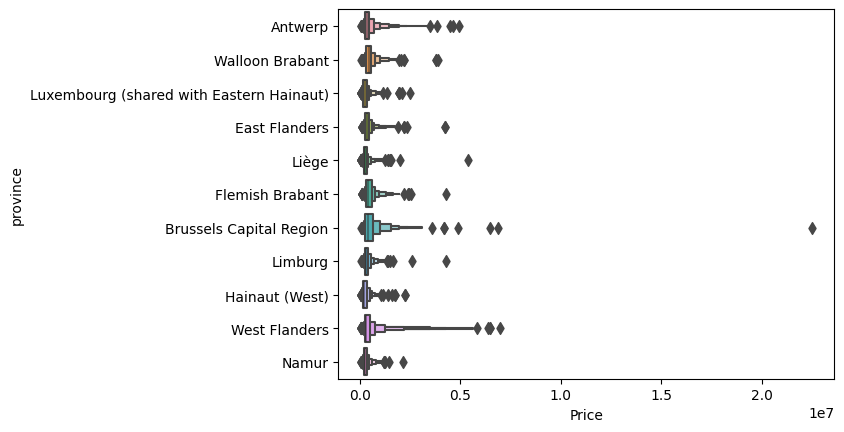

In [35]:
sns.boxenplot(x='Price', y='province', data=final1)

Relation between province and price with outliers:
* removed the outliers at 'showfliers=False' to get better view of data

<Axes: xlabel='Price', ylabel='province'>

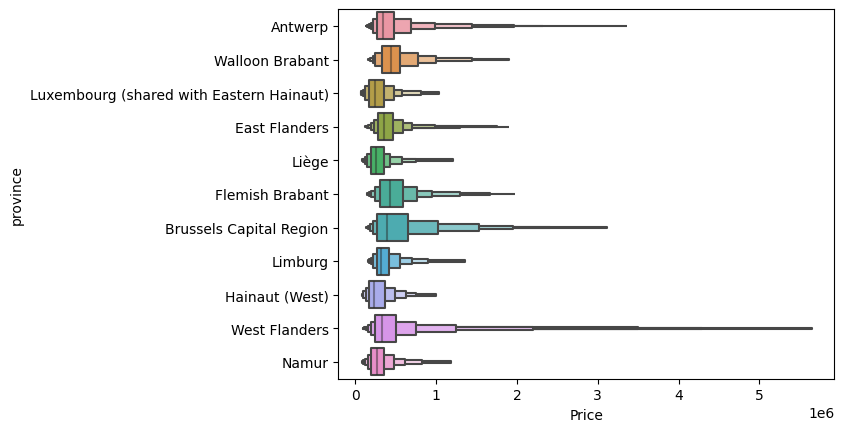

In [37]:
sns.boxenplot(x='Price', y='province', data=final1, showfliers=False)

The number of properties according to their surface using a histogram.

<Axes: xlabel='Surface of the plot', ylabel='Count'>

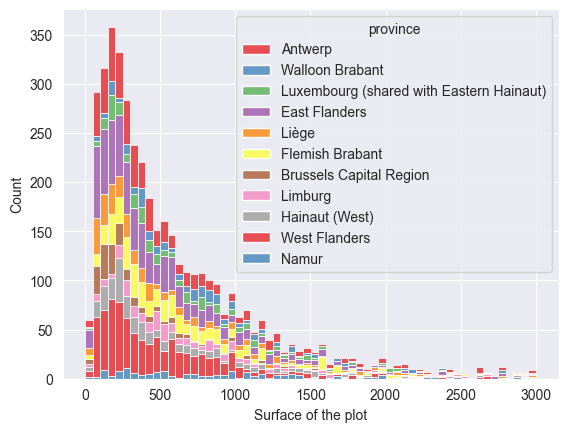

In [38]:
sns.set_style('darkgrid')
dark_palette = sns.color_palette('Set1', n_colors=11)
sns.histplot(x='Surface of the plot', data=final1, binrange=(1,3000), binwidth=50, hue='province',multiple='stack' , palette=dark_palette)